<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/ITBD/notebooks/09PandasBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejemplos big data**

usando chunksize

In [ ]:
import pandas as pd       

In [ ]:
from google.colab import files
files.upload() 

Saving gapminder.csv to gapminder.csv


{'gapminder.csv': b'country,year,pop,continent,lifeExp,gdpPercap\r\nAfghanistan,1952,8425333,Asia,28.801,779.4453145\r\nAfghanistan,1957,9240934,Asia,30.332,820.8530296\r\nAfghanistan,1962,10267083,Asia,31.997,853.10071\r\nAfghanistan,1967,11537966,Asia,34.02,836.1971382\r\nAfghanistan,1972,13079460,Asia,36.088,739.9811058\r\nAfghanistan,1977,14880372,Asia,38.438,786.11336\r\nAfghanistan,1982,12881816,Asia,39.854,978.0114388\r\nAfghanistan,1987,13867957,Asia,40.822,852.3959448\r\nAfghanistan,1992,16317921,Asia,41.674,649.3413952\r\nAfghanistan,1997,22227415,Asia,41.763,635.341351\r\nAfghanistan,2002,25268405,Asia,42.129,726.7340548\r\nAfghanistan,2007,31889923,Asia,43.828,974.5803384\r\nAlbania,1952,1282697,Europe,55.23,1601.056136\r\nAlbania,1957,1476505,Europe,59.28,1942.284244\r\nAlbania,1962,1728137,Europe,64.82,2312.888958\r\nAlbania,1967,1984060,Europe,66.22,2760.196931\r\nAlbania,1972,2263554,Europe,67.69,3313.422188\r\nAlbania,1977,2509048,Europe,68.93,3533.00391\r\nAlbania,198


**How to analyze a big file in smaller chunks with pandas chunksize?**

Let us see an example of loading a big csv file in smaller chunks. We will use the gapminder data as an example with chunk size 1000. Here the chunk size 500 means, we will be reading 500 lines at a time.


In [ ]:
# link to gapminder data as csv file
# from software carpentry website
#csv_url='http://bit.ly/2cLzoxH''

#df = pd.read_csv('gapminder.csv')


# use chunk size 500
c_size = 500

Let us use pd.read_csv to read the csv file in chunks of 500 lines with chunksize=500 option. The code below prints the shape of the each smaller chunk data frame. Note that the first three chunks are of size 500 lines. Pandas is clever enough to know that the last chunk is smaller than 500 and load only the remaining line in the data frame, in this case 204 lines.



In [ ]:
# load the big file in smaller chunks
for gm_chunk in pd.read_csv("gapminder.csv",chunksize=c_size):
    print(gm_chunk.shape)

(500, 6)
(500, 6)
(500, 6)
(204, 6)


In [ ]:
from collections import defaultdict
# default value of int is 0 with defaultdict
continent_dict = defaultdict(int) 


In [ ]:
continent_dict

defaultdict(int, {})



Let us load the big CSV file with chunnksize=500 and count the number of continent entries in each smaller chunk using the defaultdict.



In [ ]:
for gm_chunk in pd.read_csv("gapminder.csv",chunksize=500):
    for c in gm_chunk['continent']:
        continent_dict[c] += 1

print(continent_dict)


defaultdict(<class 'int'>, {'Asia': 396, 'Europe': 360, 'Africa': 624, 'Americas': 300, 'Oceania': 24})


Hemos visto como se puede ir separando por continentes,
En este caso el csv es pequeño pero se puede usar uno mayor

---------
Veamos ahora otro ejemplo sencillo
---------


In [ ]:

from collections import defaultdict
food_list = 'spam spam spam spam spam spam eggs spam'.split()
food_count = defaultdict(int) # default value of int is 0
for food in food_list:
     food_count[food] += 1 # increment element's value by 1

print(food_count)

defaultdict(<class 'int'>, {'spam': 7, 'eggs': 1})


## Ahora vamos a hacer una prueba de verdad con un big data

---



Así se puede hacer pero tarda mucho, mejor montar el drive

In [ ]:
from google.colab import files
files.upload() 

Saving ratings.csv to ratings.csv


esta parte de cargar el fichero es la más larga cuando son ficheros muy pesados, eso en jupyter va más rápido el resto es igual

In [ ]:
import pandas as pd       ## Es la referencia más conocida

import matplotlib.pyplot as plt

Let’s take a peek at the ratings.csv file, tamaño grande


In [ ]:
path='/content/drive/MyDrive/uni/Docencia/Colab Notebooks/DataScience/ITBD/data/ratings.csv'
ratings_df = pd.read_csv(path)
print(ratings_df.shape)

(22884377, 4)


In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [ ]:
# Since we’re interested in the ratings, let’s get the different rating keys on the scale, from 0.5 to 5.0

# Let's get a list of the rating scale or keys, es como hacer group by para tener todos los diferentes elementos
rate_keys = list(ratings_df['rating'].unique())
# let's sort the ratings keys from highest to lowest.
rate_keys = sorted(rate_keys, reverse=True) 
 
print(rate_keys)

[5.0, 4.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5]


We now know our rating scale. Next, is to find a way to get the number of ratings for each key on the scale. Yet due to the memory size, we should read the data set in chunks and perform vectorized operations on each chunk. Avoiding loops except necessary.

Our first goal is to count the number of movie ratings per rating key. 
Out of the 22 million-plus ratings, how many ratings does each key hold? Answering this question 
automatically answers our first question:-

let’s create a dictionary whose keys are the unique rating keys using a simple for loop. 
Then we assign each key to value zero.

Es muy interesante porque es un ejemplo muy genérico de inicializar rangos



In [ ]:
ratings_dict = {}
for i in rate_keys: ratings_dict[i] = 0
ratings_dict

{0.5: 0,
 1.0: 0,
 1.5: 0,
 2.0: 0,
 2.5: 0,
 3.0: 0,
 3.5: 0,
 4.0: 0,
 4.5: 0,
 5.0: 0}

Next, we use the python enumerate() function, pass the pd.read_csv() function as its first argument, then within the read_csv() function,
we specify chunksize = 1000000, to read chunks of one million rows of data at a time.

We start the enumerate() function index at 1, passing start=1 as its second argument. 
So that we can compute the average number of bytes processed for each chunk using the index. 
Then we use a simple for loop on the rating keys and extract the number of ratings per key, 
for each chunk and sum these up for each key in the ratings_dict

The final ratings_dict will contain each rating key as keys and total ratings per key as values.

In [ ]:
!ls

drive  gapminder.csv  sample_data


In [ ]:
# Initialise a variable to compute average bytes per chunk
ave_bytes = 0

# then we initialise our loop counter
count = 0

# This enumerate function selects repeated chunks of 1,000,000 rows of data 
for index, chunk in enumerate(pd.read_csv(path, chunksize= 1000000),start=1):
    # We add total memory per chunk to ave_bytes
    ave_bytes += chunk.memory_usage().sum()
    
    # This inner loop iterates through the rate keys only.Then it does 
    # vectorised selections on the dataframe to select count of each rate key.
    for i in rate_keys:
        count = len(chunk[chunk['rating'] == i])
        ratings_dict[i] += count
        
print("Total number of chunks:",index)
ave_bytes = ave_bytes / index
print("Average bytes per loop:",ave_bytes)
print(ratings_dict)

Total number of chunks: 23
Average bytes per loop: 31839265.04347826
{5.0: 3358218, 4.5: 1813922, 4.0: 6265623, 3.5: 2592375, 3.0: 4783899, 2.5: 1044176, 2.0: 1603254, 1.5: 337605, 1.0: 769654, 0.5: 315651}


In [ ]:
        count = len(chunk[chunk['rating'] == i])
        count


12320

In [ ]:
# We use the operator module to easily get the max and min values
import operator
max(ratings_dict.items(), key=operator.itemgetter(1))

# We can see that the rating key with the highest rating value is 4.0 with a value of 6,265,623 movie ratings.

(4.0, 6265623)

Let’s visualize the plot of rating keys and values from max to min.

Let’s create a data frame (ratings_dict_df) from the ratings_dict by simply casting each value to a list and passing the ratings_dict to the pandas DataFrame() function. Then we sort the data frame by Count descending.

In [ ]:
# First let's change each integer value in the dictionary to a list. 
# Because each column in a Dataframe should be a list or series, not numbers.

# esto son conveniencias para lo que viene después con el dataframe

empty_list = []
for i,j in ratings_dict.items():
    empty_list.append(j)
    ratings_dict[i] = empty_list
    empty_list = []
print(ratings_dict)

{5.0: [3358218], 4.5: [1813922], 4.0: [6265623], 3.5: [2592375], 3.0: [4783899], 2.5: [1044176], 2.0: [1603254], 1.5: [337605], 1.0: [769654], 0.5: [315651]}


In [ ]:
# para visualizar lo mejor es usar las librerías de pandas y numpy que se integran bien con maptplot
# Now we can create our DataFrame with a named index and column
ratings_dict_df = pd.DataFrame(ratings_dict).T  # Let's tranpose it from row to column vector
ratings_dict_df = ratings_dict_df.reset_index()  # Let's reset the index from the rating keys back to default
ratings_dict_df.columns=['Rating_Keys','Count']
ratings_dict_df

,Rating_Keys,Count
0,5.0,3358218
1,4.5,1813922
2,4.0,6265623
3,3.5,2592375
4,3.0,4783899
5,2.5,1044176
6,2.0,1603254
7,1.5,337605
8,1.0,769654
9,0.5,315651


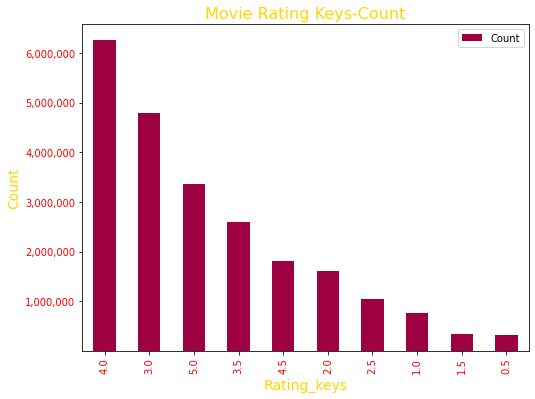

In [ ]:
import matplotlib.pyplot as plt

ratings_dict_df.plot(kind='bar', x = 'Rating_Keys' , y = 'Count', figsize = (8,6), colormap = 'Spectral')
y_ticks_custom = ['6,000,000', '5,000,000','4,000,000','3,000,000','2,000,000','1,000,000']
plt.yticks([6000000,5000000,4000000,3000000,2000000,1000000], y_ticks_custom)
plt.title('Movie Rating Keys-Count', color='gold', fontsize=16)
plt.ylabel('Count', color='gold', fontsize = 14)
plt.xlabel('Rating_keys', color='gold', fontsize = 14)
plt.xticks(color = 'red')
plt.yticks(color = 'r')
plt.show()

In [ ]:
# si el gráfico anterior lo quiero en orden tendré primero que ordenarlo

ratings_dict_df = ratings_dict_df.sort_values('Count',ascending=False)
ratings_dict_df

,Rating_Keys,Count
2,4.0,6265623
4,3.0,4783899
0,5.0,3358218
3,3.5,2592375
1,4.5,1813922
6,2.0,1603254
5,2.5,1044176
8,1.0,769654
7,1.5,337605
9,0.5,315651


In [ ]:
# load pandas 
import pandas as pd

subir el fichero de datos